## SVM (Digit Classification)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_digits
dataset = load_digits()
# print(dataset.DESCR)
# dataset

In [4]:
X = dataset.data
Y = dataset.target

As we know that not all features are comparabally usefull, so we will use PCA here to reduce dimensionality.

In [5]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)
X_new = pca.fit_transform(X_scaled)
X_new.shape

(1797, 49)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,Y,train_size=0.8,shuffle=True)

In [8]:
from sklearn.svm import SVC
model = SVC(C=1,kernel='linear')

In [9]:
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

0.9833333333333333

### Behaviour of model with C (regularization parameter) for different models

Note: Strength of Regularization is inversely proportional to C

In [10]:
C1 = np.arange(start=0.001,stop=1,step=0.01,dtype='float')
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
dict1 = {'linear':[],'poly':[],'rbf':[], 'sigmoid':[]}

for i in kernel:
    for j in C1:
        model = SVC(C=j,kernel=i)
        sc = model.fit(X_train,Y_train).score(X_test,Y_test)
        dict1[i].append(sc)

In [11]:
C2 = np.arange(start=1,stop=10,step=0.1,dtype='float')
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
dict2 = {'linear':[],'poly':[],'rbf':[], 'sigmoid':[]}

for i in kernel:
    for j in C2:
        model = SVC(C=j,kernel=i)
        sc = model.fit(X_train,Y_train).score(X_test,Y_test)
        dict2[i].append(sc)

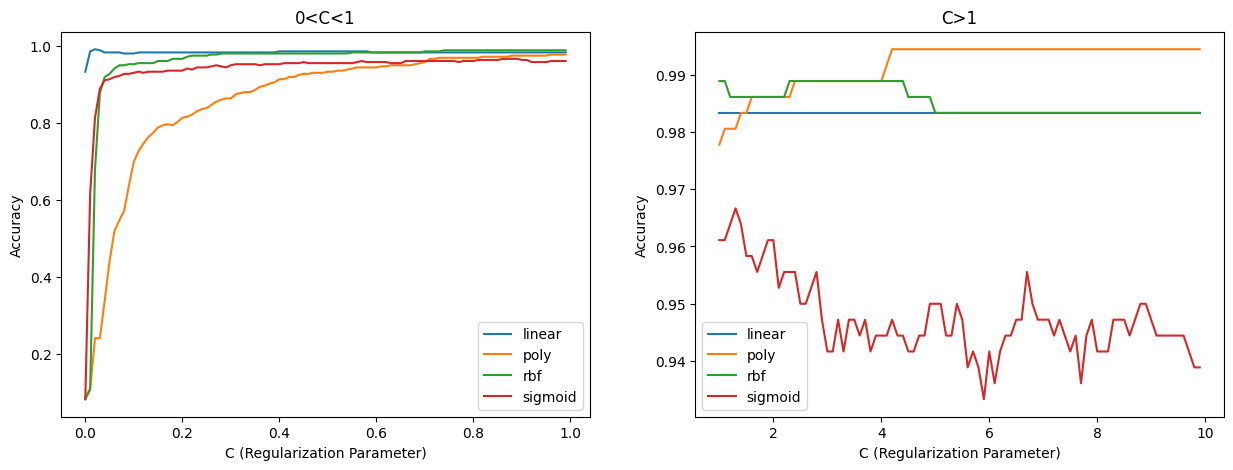

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(C1,dict1['linear'])
plt.plot(C1,dict1['poly'])
plt.plot(C1,dict1['rbf'])
plt.plot(C1,dict1['sigmoid'])
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('0<C<1')
plt.legend(kernel)

plt.subplot(1,2,2)
plt.plot(C2,dict2['linear'])
plt.plot(C2,dict2['poly'])
plt.plot(C2,dict2['rbf'])
plt.plot(C2,dict2['sigmoid'])
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Accuracy')
plt.title('C>1')
plt.legend(kernel)

plt.show()